In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

# model libralies
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report,mean_squared_error,r2_score,mean_absolute_error,confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from numpy.polynomial.polynomial import polyfit
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# load grade student data
df = pd.read_csv("./dataset/student/student-por.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**Attributes information:**
1. **school** - *student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).*
2. **sex** - *student's sex (binary: 'F' - female or 'M' - male).*
3. **age** - *student's age (numeric: from 15 to 22).*
4. **address** - *student's home address type (binary: 'U' - urban or 'R' - rural).*
5. **famsize** - *family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3).*
6. **Pstatus**- *parent's cohabitation status (binary: 'T' - living together or 'A' - apart).*
7. **Medu** - *mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education).*
8. **Fedu** - *father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education).*
9. **Mjob** - *mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other').*
10. **Fjob**- *father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other').*
11. **reason** - *reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other').*
12. **guardian** - *student's guardian (nominal: 'mother', 'father' or 'other').
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour).*
14. **studytime** - *weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).*
15. **failures** - *number of past class failures (numeric: n if 0 <= n < 3, else 3).*
16. **schoolsup** - *extra educational support (binary: yes or no).*
17. **famsup** - *family educational support (binary: yes or no).*
18. **paid** - *extra paid classes within the course subject (Math or Portuguese) (binary: yes or no).*
19. **activities** - *extra-curricular activities (binary: yes or no).*
20. **nursery** - *attended nursery school (binary: yes or no).*
21. **higher** - *wants to take higher education (binary: yes or no).*
22. **internet** - *nternet access at home (binary: yes or no).*
23. **romantic** - *with a romantic relationship (binary: yes or no).*
24. **famrel** - *quality of family relationships (numeric: from 1 - very bad to 5 - excellent).*
25. **freetime** - *free time after school (numeric: from 1 - very low to 5 - very high).*
26. **goout** - *going out with friends (numeric: from 1 - very low to 5 - very high).*
27. **Dalc** - *workday alcohol consumption (numeric: from 1 - very low to 5 - very high).*
28. **Walc** - *weekend alcohol consumption (numeric: from 1 - very low to 5 - very high).*
29. **health** - *current health status (numeric: from 1 - very bad to 5 - very good).*
30. **absences** - *number of school absences (numeric: from 0 to 93).*
* Grades which are related with the course subject:
31. **G1** - *first period grade (numeric: from 0 to 20).*
32. **G2** - *second period grade (numeric: from 0 to 20)*
33. **G3** - *final grade (numeric: from 0 to 20, **Output Target**)*

In [4]:
print(len(df))
print(df.shape)

649
(649, 33)


In [5]:
# check null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
# Statistics on numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [9]:
# Statistics on categorical data
df.describe(include="object").T

,count,unique,top,freq
school,649,2,GP,423
sex,649,2,F,383
address,649,2,U,452
famsize,649,2,GT3,457
Pstatus,649,2,T,569
Mjob,649,5,other,258
Fjob,649,5,other,367
reason,649,4,course,285
guardian,649,3,mother,455
schoolsup,649,2,no,581


In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [64]:
# convert 20 point scale -> 10 points scale
df["G1"] = df["G1"]/2
df["G2"] = df["G2"]/2
df["G3"] = df["G3"]/2

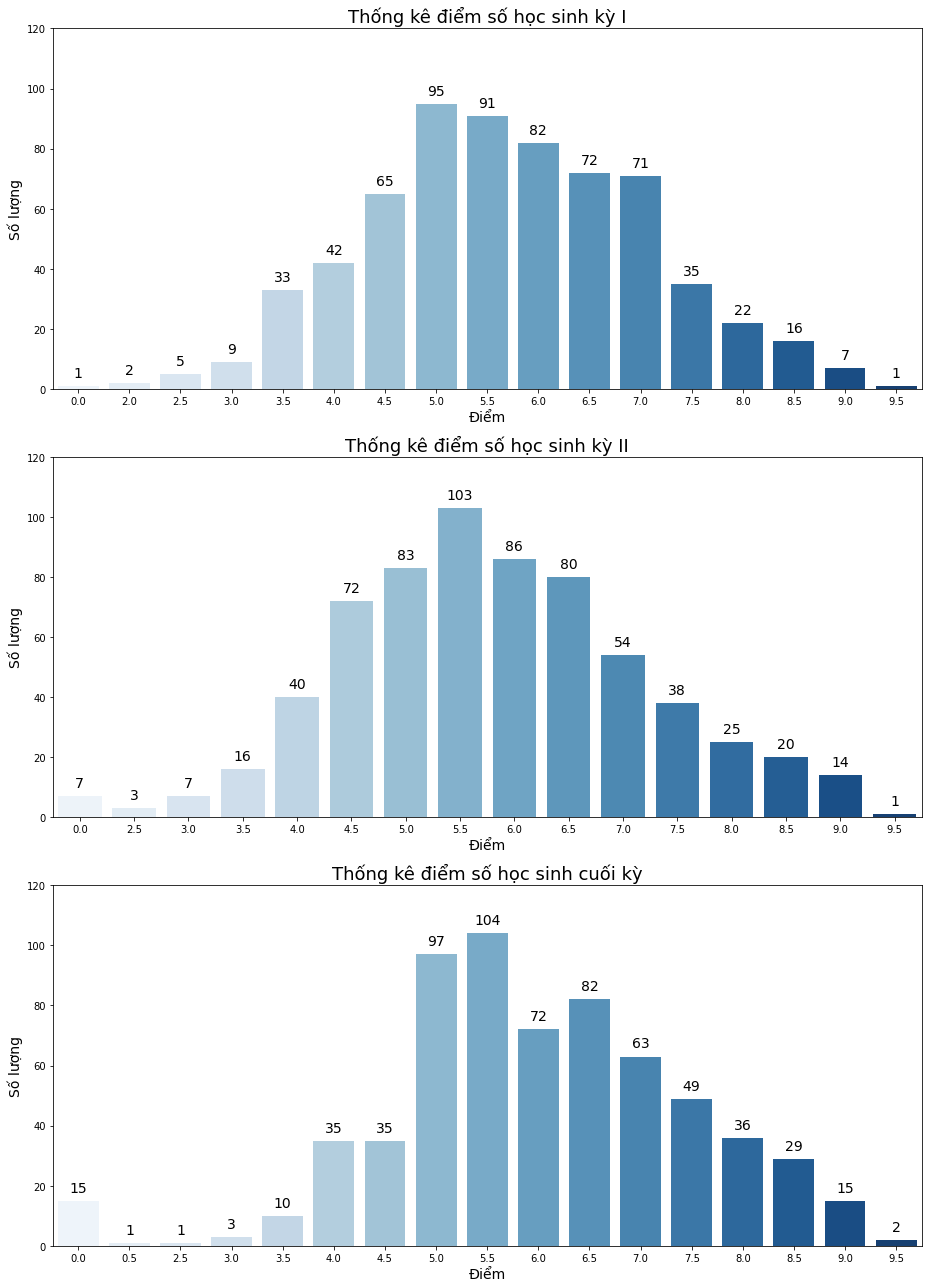

In [8]:
# Visualize student score statistics
# create a 3x1 grid of subplots
fig, axs = plt.subplots(3, 1, figsize=(13, 18), tight_layout = True)
fig.subplots_adjust(hspace=5)

# plot for G1
b1 = sns.countplot(x='G1', data=df, ax=axs[0], palette="Blues")
b1.set_title('Thống kê điểm số học sinh kỳ I', fontsize=18)
b1.set_xlabel('Điểm', fontsize=14)
b1.set_ylabel('Số lượng', fontsize=14)
b1.set_ylim(0,120)
# display count on top of barplot
for p in b1.patches:
    b1.annotate(f'\n{p.get_height()}', (p.get_x()+p.get_width()/2, p.get_height()+12), 
                ha='center', va='top', color='black', size=14)

# plot for G2
b2 = sns.countplot(x='G2', data=df, ax=axs[1], palette="Blues")
b2.set_title('Thống kê điểm số học sinh kỳ II', fontsize=18)
b2.set_xlabel('Điểm', fontsize=14)
b2.set_ylabel('Số lượng', fontsize=14)
b2.set_ylim(0,120)
# display count on top of barplot
for p in b2.patches:
    b2.annotate(f'\n{p.get_height()}', (p.get_x()+p.get_width()/2, p.get_height()+12), 
                ha='center', va='top', color='black', size=14)

# plot for G3
b3 = sns.countplot(x='G3', data=df, ax=axs[2], palette="Blues")
b3.set_title('Thống kê điểm số học sinh cuối kỳ', fontsize=18)
b3.set_xlabel('Điểm', fontsize=14)
b3.set_ylabel('Số lượng', fontsize=14)
b3.set_ylim(0,120)
# display count on top of barplot
for p in b3.patches:
    b3.annotate(f'\n{p.get_height()}', (p.get_x()+p.get_width()/2, p.get_height()+12), 
                ha='center', va='top', color='black', size=14)

# show plot
plt.show()

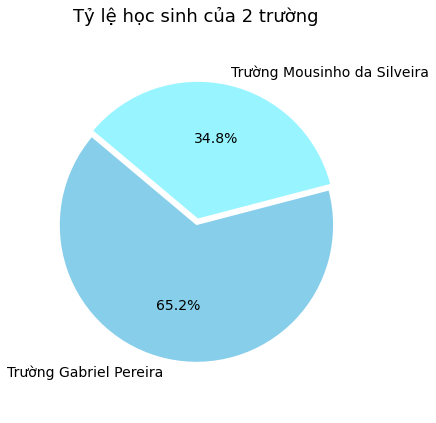

Trường Gabriel Pereira         423
Trường Mousinho da Silveira    226
Name: school, dtype: int64


In [13]:
# visualize the number of students of each school
# Calculate percentage values
total = len(df)
value_counts = df['school'].value_counts()
percentages = value_counts/total * 100

# Rename the labels from 'GP' and 'MS' to custom names
value_counts.index = ['Trường Gabriel Pereira', 'Trường Mousinho da Silveira']

# Create a pie chart with custom colors and explode parameter
plt.figure(figsize=(6, 6))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=['#87CEEB', '#98F5FF'],
    textprops={'fontsize': 14},
    explode=(0.05, 0))

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')
# Add a title
plt.title("Tỷ lệ học sinh của 2 trường", fontsize=18)
# Show the plot
plt.tight_layout()
plt.show()
# print values
print(value_counts)

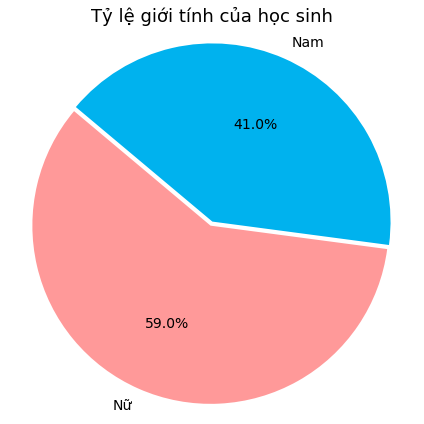

Nữ     383
Nam    266
Name: sex, dtype: int64


In [14]:
# visualize the gender ratio
# calculate percentage values
total = len(df)
value_counts = df['sex'].value_counts()
percentages = value_counts / total * 100

# rename the labels from 'F' and 'M' to custom names
value_counts.index = ['Nữ', 'Nam']

# create a pie chart with custom colors and explode parameter
plt.figure(figsize=(6, 6))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=['#ff9999', '#00B2EE'],
    explode=(0.025, 0),
    textprops={'fontsize': 14})

# equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')
# add a title
plt.title("Tỷ lệ giới tính của học sinh", fontsize=18)
# show the plot
plt.tight_layout()
plt.show()
# print values
print(value_counts)

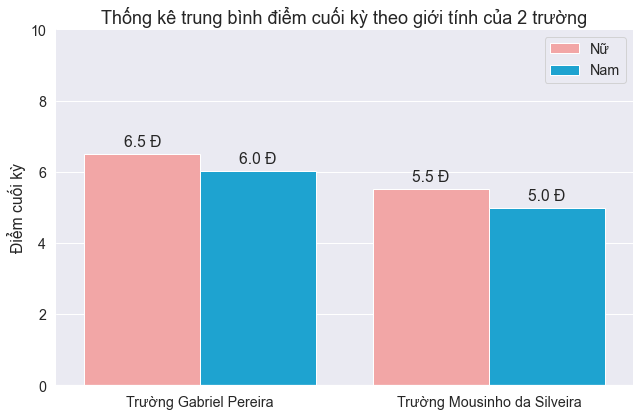

In [9]:
# visualize average score statistics by gender of 2 schools
# set the Seaborn style with the custom color palette
sns.set_theme(style="white", palette=None)
sns.set(font_scale=1.3)
# draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="school", y="G3", hue="sex", 
    height=6, aspect=1.5, ci=None,
    palette=sns.color_palette(['#ff9999', '#00B2EE']), legend=False)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f} Đ' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=5)

g.set(ylim=(0, 10))
g.despine(left=True)
g.set_axis_labels("", "Điểm cuối kỳ")

plt.xticks([0,1], ["Trường Gabriel Pereira", "Trường Mousinho da Silveira"])
plt.title("Thống kê trung bình điểm cuối kỳ theo giới tính của 2 trường", fontsize=18)
plt.legend(labels=['Nữ', 'Nam'])
plt.show()

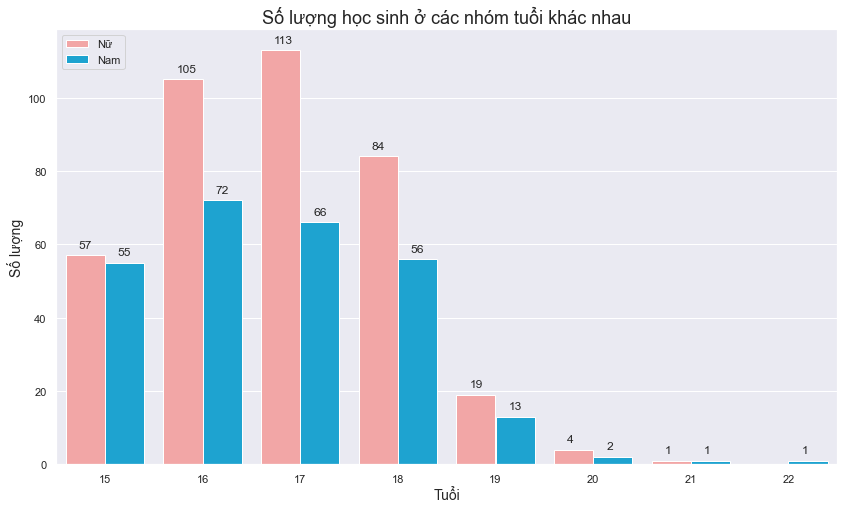

In [16]:
# statistical visualization of the number of students in different age groups
sns.set(rc = {'figure.figsize':(14, 8)})
a = sns.countplot(x='age', hue='sex', data=df, palette=sns.color_palette(['#ff9999', '#00B2EE']))
a.set_title('Số lượng học sinh ở các nhóm tuổi khác nhau', fontsize=18)
a.set_xlabel("Tuổi", fontsize=14)
a.set_ylabel("Số lượng", fontsize=14)

# show values on top of countplot
for p in a.patches:
   a.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/3, p.get_height()+2))
   
plt.legend(labels=['Nữ', 'Nam'])
plt.show()

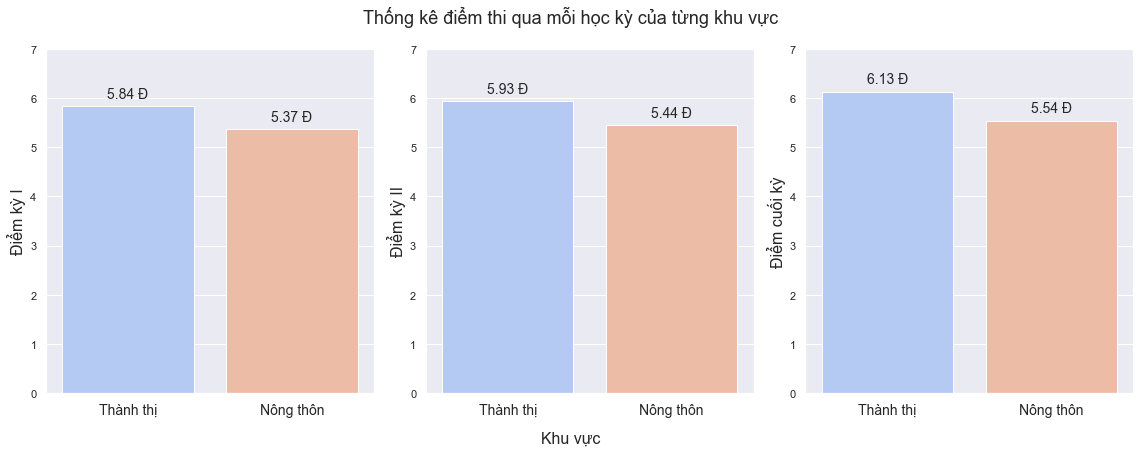

In [17]:
# visualize score statistics by each living area
# create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
fig.text(0.5, -0.03, 'Khu vực', ha='center',fontsize=16)    # main Xlabel
plt.suptitle('Thống kê điểm thi qua mỗi học kỳ của từng khu vực', fontsize=18)

# Grade 1 plot
g1 = sns.barplot(x=df['address'], y=df['G1'], data=df, ci=None, ax=axs[0], palette="coolwarm")
g1.set_xlabel('')
g1.set_ylabel('Điểm kỳ I', fontsize=16)
g1.set_xticklabels(["Thành thị", "Nông thôn"], fontsize=14)
g1.set_ylim(0,7)
# show values
for c in g1.containers:
    labels = [f'{(v.get_height()):.2f} Đ' for v in c]
    g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
# g1.bar_label(g1.containers[0])

# Grade 2 plot
g2 = sns.barplot(x=df['address'], y=df['G2'], data=df, ci=None, ax=axs[1], palette="coolwarm")
g2.set_xlabel('')
g2.set_ylabel('Điểm kỳ II', fontsize=16)
g2.set_xticklabels(["Thành thị", "Nông thôn"], fontsize=14)
g2.set_ylim(0,7)
# show values
for c in g2.containers:
    labels = [f'{(v.get_height()):.2f} Đ' for v in c]
    g2.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

# Final Grade plot
g3 = sns.barplot(x=df['address'], y=df['G3'], data=df, ci=None, ax=axs[2], palette="coolwarm")
g3.set_xlabel('')
g3.set_ylabel('Điểm cuối kỳ', fontsize=16)
g3.set_xticklabels(["Thành thị", "Nông thôn"], fontsize=14)
g3.set_ylim(0,7)
# show values
for c in g3.containers:
    labels = [f'{(v.get_height()):.2f} Đ' for v in c]
    g3.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

# adjust layout
plt.tight_layout()
# show the plots
plt.show()

In [5]:
# build function to draw 3 subplot (bar char)
def draw_3_subplot(title, xlabel, ylabel1, ylabel2, ylabel3, x, y1, y2, y3):
    # create a 1x3 grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(16, 6))
    fig.text(0.5, -0.03, xlabel, ha='center',fontsize=16)    # main Xlabel
    plt.suptitle(title, fontsize=18)

    # Grade 1 plot
    g1 = sns.barplot(x=df[x], y=df[y1], data=df, ci=None, ax=axs[0], palette="crest")
    g1.set_xlabel('')
    g1.set_ylabel(ylabel1, fontsize=16)
    g1.set_ylim(0,7)
    g1.set_xticklabels(['Không', 'Có'], fontsize=14)
    # show values
    for c in g1.containers:
        labels = [f'{(v.get_height()):.2f} Đ' for v in c]
        g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
    # g1.bar_label(g1.containers[0])

    # Grade 2 plot
    g2 = sns.barplot(x=df[x], y=df[y2], data=df, ci=None, ax=axs[1], palette="crest")
    g2.set_xlabel('')
    g2.set_ylabel(ylabel2, fontsize=16)
    g2.set_ylim(0,7)
    g2.set_xticklabels(['Không', 'Có'], fontsize=14)
    # show values
    for c in g2.containers:
        labels = [f'{(v.get_height()):.2f} Đ' for v in c]
        g2.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

    # Final Grade plot
    g3 = sns.barplot(x=df[x], y=df[y3], data=df, ci=None, ax=axs[2], palette="crest")
    g3.set_xlabel('')
    g3.set_ylabel(ylabel3, fontsize=16)
    g3.set_ylim(0,7)
    g3.set_xticklabels(['Không', 'Có'], fontsize=14)
    # show values
    for c in g3.containers:
        labels = [f'{(v.get_height()):.2f} Đ' for v in c]
        g3.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

    # adjust layout
    plt.tight_layout()
    
    # show plot
    plt.show()

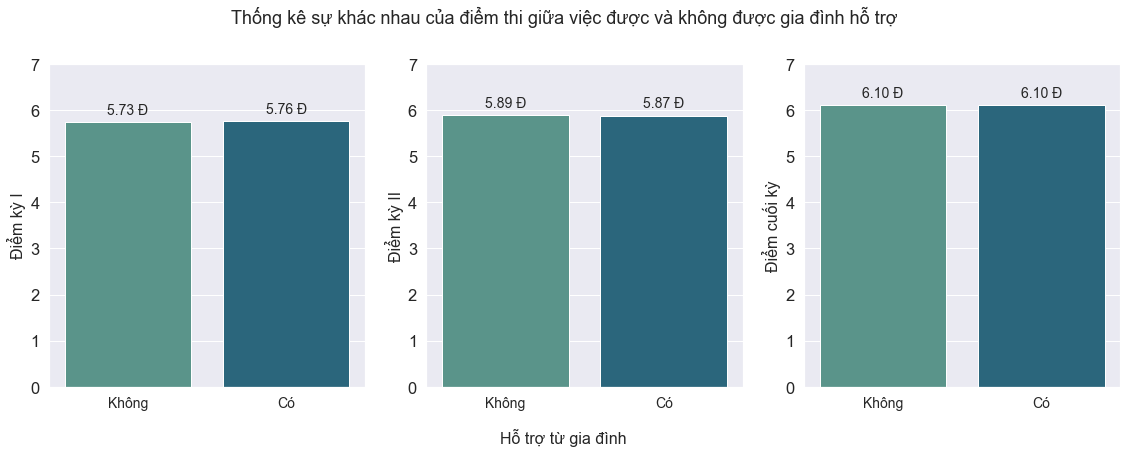

In [131]:
draw_3_subplot('Thống kê sự khác nhau của điểm thi giữa việc được và không được gia đình hỗ trợ', 
               'Hỗ trợ từ gia đình', 'Điểm kỳ I', 'Điểm kỳ II', 'Điểm cuối kỳ', 'famsup', 
               'G1', 'G2', 'G3')

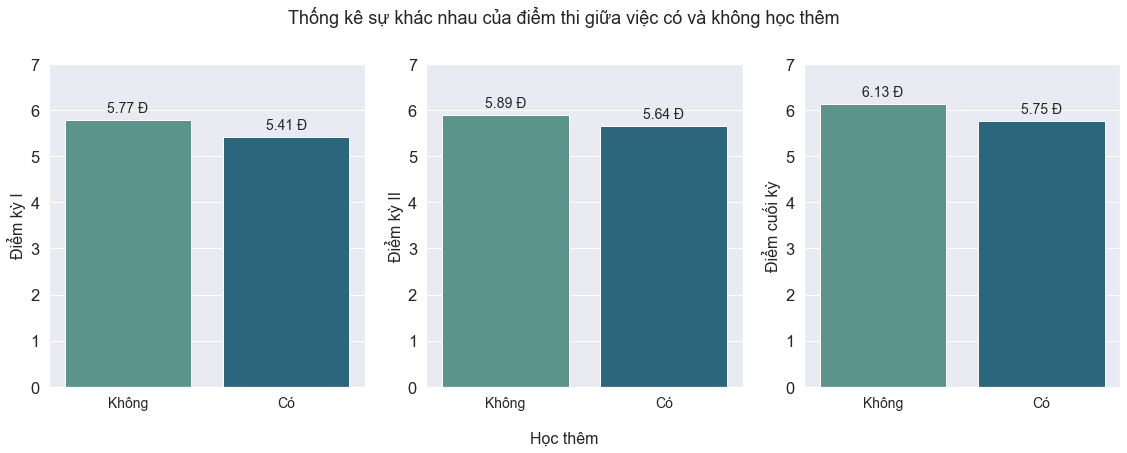

In [132]:
draw_3_subplot('Thống kê sự khác nhau của điểm thi giữa việc có và không học thêm', 
               'Học thêm', 'Điểm kỳ I', 'Điểm kỳ II', 'Điểm cuối kỳ', 'paid', 
               'G1', 'G2', 'G3')

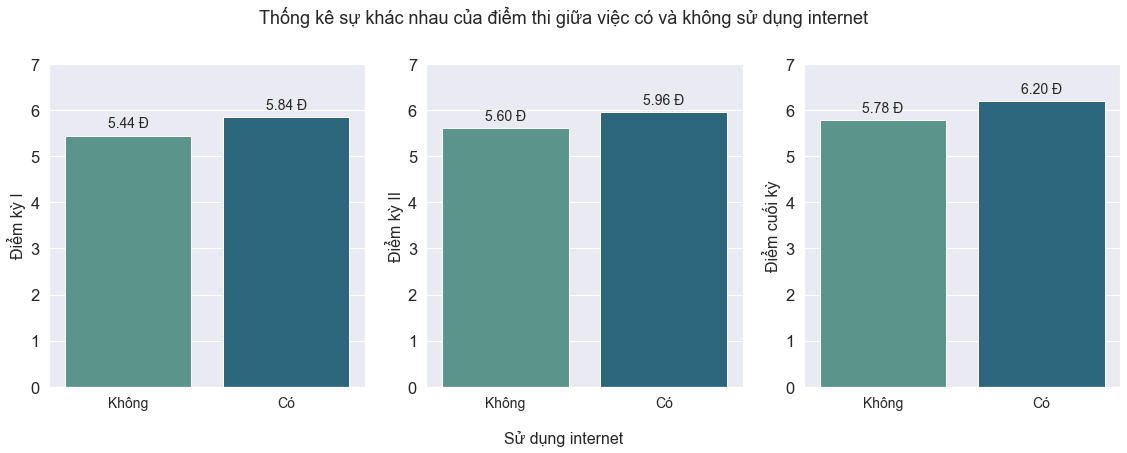

In [133]:
draw_3_subplot('Thống kê sự khác nhau của điểm thi giữa việc có và không sử dụng internet', 
               'Sử dụng internet', 'Điểm kỳ I', 'Điểm kỳ II', 'Điểm cuối kỳ', 'internet', 
               'G1', 'G2', 'G3')

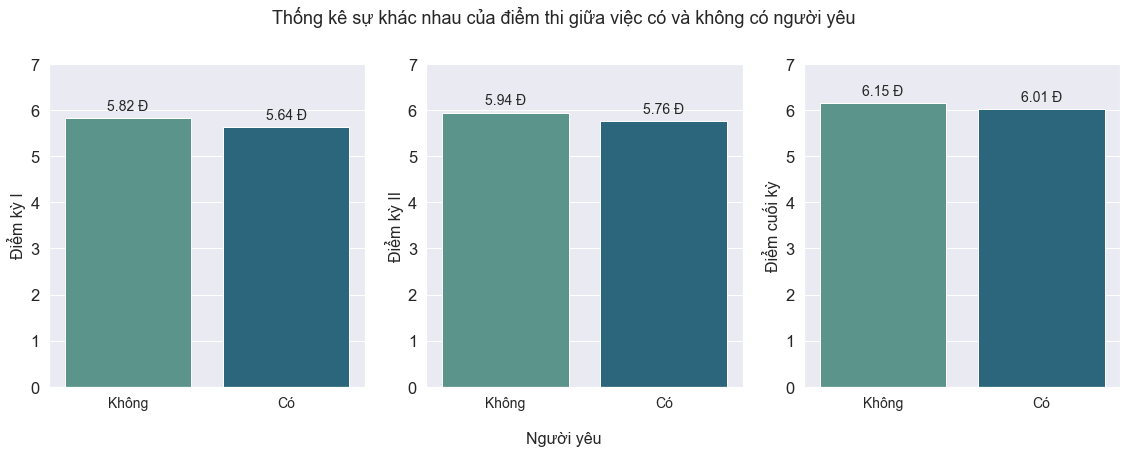

In [134]:
draw_3_subplot('Thống kê sự khác nhau của điểm thi giữa việc có và không có người yêu', 
               'Người yêu', 'Điểm kỳ I', 'Điểm kỳ II', 'Điểm cuối kỳ', 'romantic', 
               'G1', 'G2', 'G3')

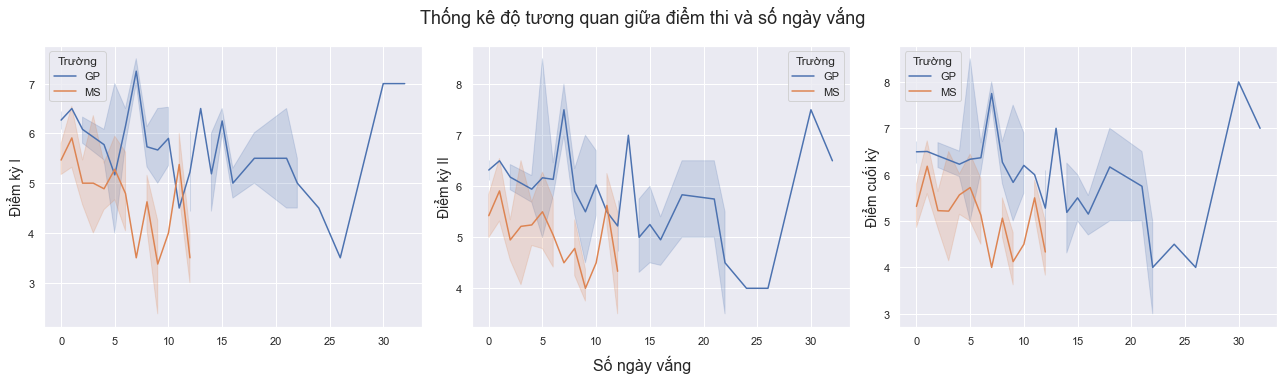

In [23]:
# create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle("Thống kê độ tương quan giữa điểm thi và số ngày vắng", fontsize=18)
fig.text(0.5, -0.03, 'Số ngày vắng', ha='center',fontsize=16)    # main Xlabel

# plot the first chart for 'G1'
b1 = sns.lineplot(x='absences', y='G1', hue='school', markers='o', data=df, ax=axes[0])
b1.set_xlabel('', fontsize=14)
b1.legend(title='Trường')
b1.set_ylabel('Điểm kỳ I', fontsize=14)

# plot the second chart for 'G2'
b2 = sns.lineplot(x='absences', y='G2', hue='school', markers='o', data=df, ax=axes[1])
b2.set_xlabel('', fontsize=14)
b2.legend(title='Trường')
b2.set_ylabel('Điểm kỳ II', fontsize=14)

# plot the third chart for 'G3'
b3 = sns.lineplot(x='absences', y='G3', hue='school', markers='o', data=df, ax=axes[2])
b3.set_xlabel('', fontsize=14)
b3.legend(title='Trường')
b3.set_ylabel('Điểm cuối kỳ', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plots
plt.show()

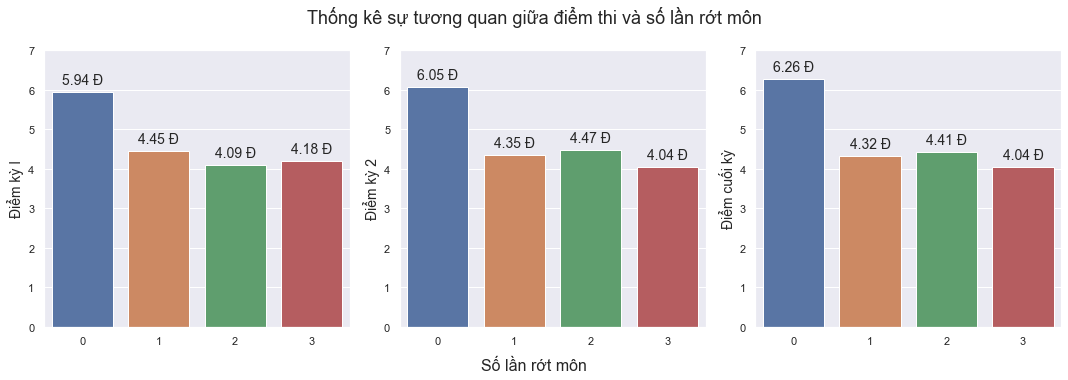

In [24]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.text(0.5, -0.03, 'Số lần rớt môn', ha='center',fontsize=16)    # main Xlabel
plt.suptitle('Thống kê sự tương quan giữa điểm thi và số lần rớt môn', fontsize=18)

# plot the first chart for 'G1'
b1 = sns.barplot(x=df['failures'], y=df['G1'], ci=None, data=df, ax=axes[0])
b1.set_xlabel('')
b1.set_ylabel('Điểm kỳ I', fontsize=14)
b1.set_ylim(0,7)
# show values
for c in b1.containers:
    labels = [f'{(v.get_height()):.2f} Đ' for v in c]
    b1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

# plot the second chart for 'G2'
b2 = sns.barplot(x=df['failures'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('')
b2.set_ylabel('Điểm kỳ 2', fontsize=14)
b2.set_ylim(0,7)
# show values
for c in b2.containers:
    labels = [f'{(v.get_height()):.2f} Đ' for v in c]
    b2.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

# plot the third chart for 'G3'
b3 = sns.barplot(x=df['failures'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('')
b3.set_ylabel('Điểm cuối kỳ', fontsize=14)
b3.set_ylim(0,7)
# show values
for c in b3.containers:
    labels = [f'{(v.get_height()):.2f} Đ' for v in c]
    b3.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

# adjust the spacing between subplots
plt.tight_layout()
# display the plots
plt.show()

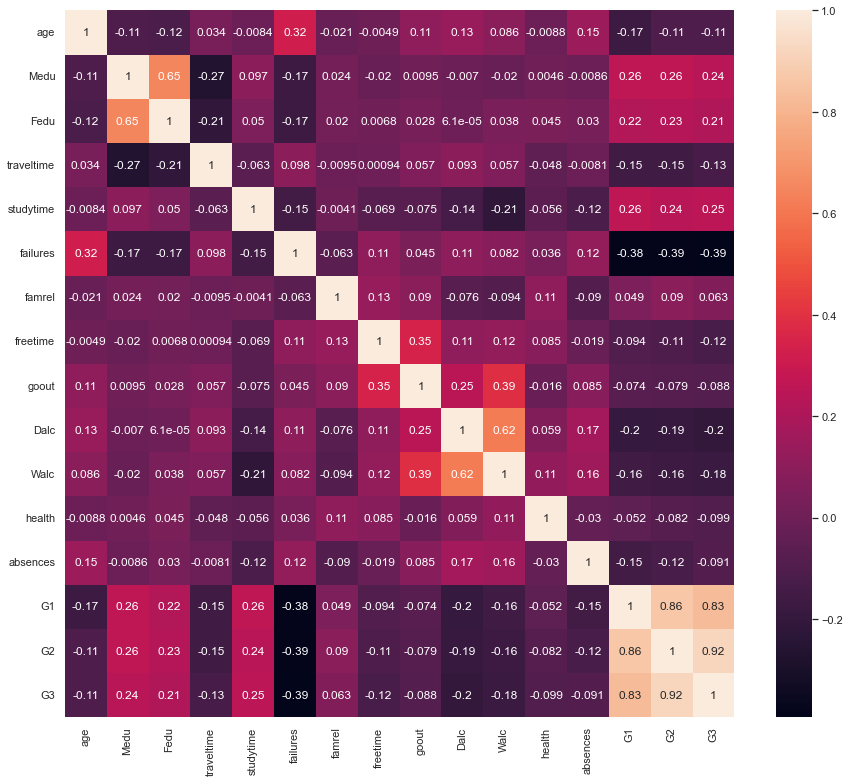

In [65]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True,cbar=True)
plt.show()

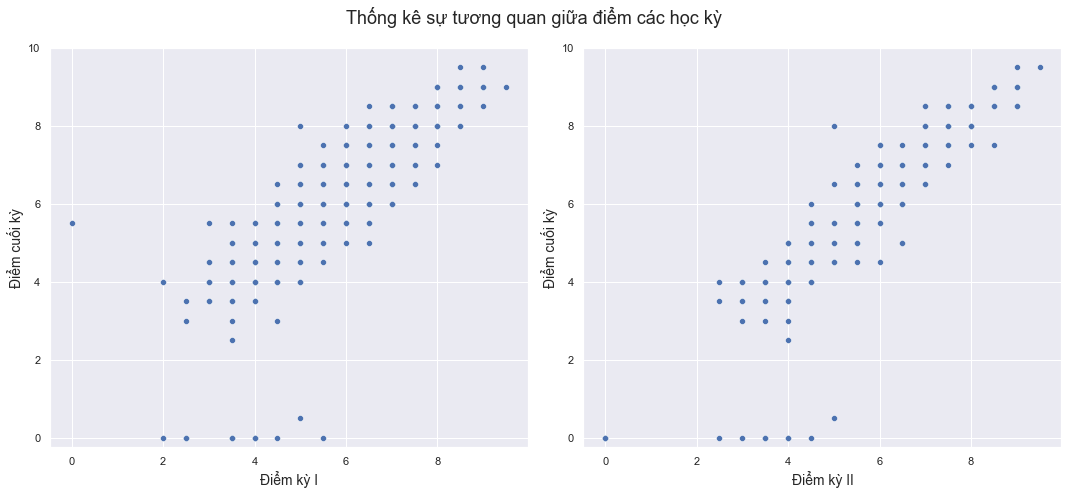

In [26]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.suptitle('Thống kê sự tương quan giữa điểm các học kỳ', fontsize=18)

s1= sns.scatterplot(x=df['G1'],y=df['G3'],data=df,ax=axes[0])
s1.set_xlabel('Điểm kỳ I', fontsize = 14)
s1.set_ylabel('Điểm cuối kỳ', fontsize = 14)
s1.set_ylim(-0.25,10)

s2= sns.scatterplot(x=df['G2'],y=df['G3'],data=df,ax=axes[1])
s2.set_xlabel('Điểm kỳ II', fontsize = 14)
s2.set_ylabel('Điểm cuối kỳ', fontsize = 14)
s2.set_ylim(-0.25,10)

# adjust the spacing between subplots
plt.tight_layout()
# display the plots
plt.show()

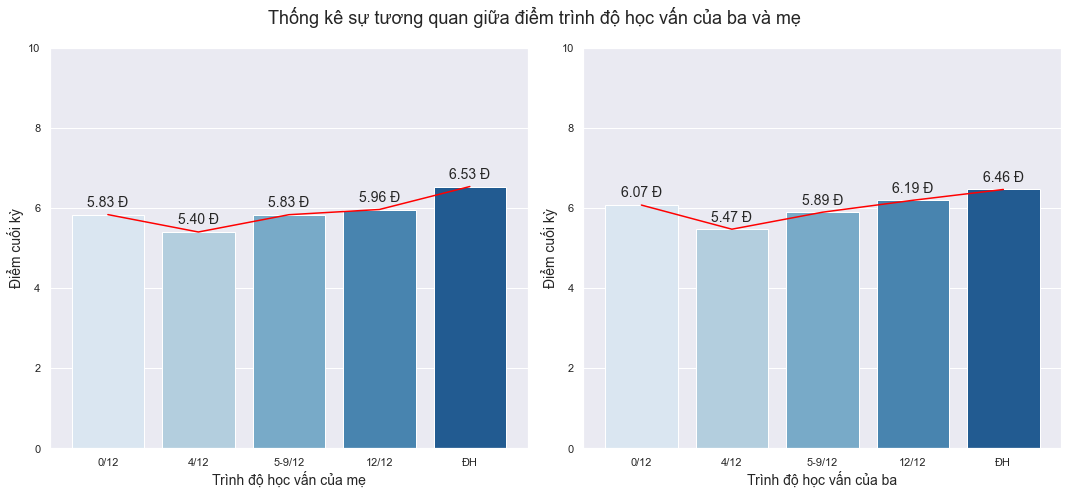

In [27]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.suptitle('Thống kê sự tương quan giữa điểm trình độ học vấn của ba và mẹ', fontsize=18)

s1= sns.barplot(x=df['Medu'], y=df['G3'], data=df, ax=axes[0], ci=None, palette='Blues')
s1=sns.lineplot(x=df['Medu'],y=df['G3'],data=df,ax=axes[0], ci=None, color='red')
s1.set_xlabel('Trình độ học vấn của mẹ', fontsize = 14)
s1.set_ylabel('Điểm cuối kỳ', fontsize = 14)
s1.set_xticklabels(['0/12', '4/12', '5-9/12', '12/12', 'ĐH'])
s1.set_ylim(0,10)
# show values
for c in s1.containers:
    labels = [f'{(v.get_height()):.2f} Đ' for v in c]
    s1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

s2= sns.barplot(x=df['Fedu'],y=df['G3'],data=df,ax=axes[1], ci=None, palette='Blues')
s2=sns.lineplot(x=df['Fedu'],y=df['G3'],data=df,ax=axes[1], ci=None, color='red')
s2.set_xlabel('Trình độ học vấn của ba', fontsize = 14)
s2.set_ylabel('Điểm cuối kỳ', fontsize = 14)
s2.set_xticklabels(['0/12', '4/12', '5-9/12', '12/12', 'ĐH'])
s2.set_ylim(0,10)
# show values
for c in s2.containers:
    labels = [f'{(v.get_height()):.2f} Đ' for v in c]
    s2.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

# adjust the spacing between subplots
plt.tight_layout()
# display the plots
plt.show()

In [66]:
# drop row 'G3' < 1
df.drop(df[df['G3'] < 1].index, inplace = True)

In [67]:
# one hot encoding
df_ohe = pd.get_dummies(df, drop_first=True)

In [68]:
df_ohe.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

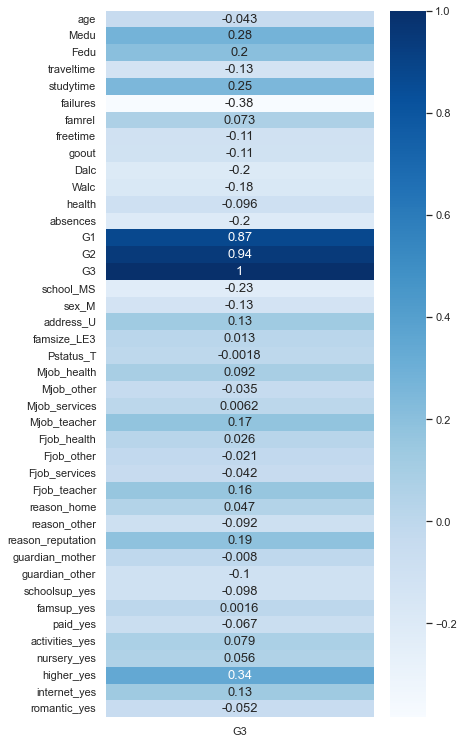

In [71]:
# calculate the correlation matrix for all columns
correlation_matrix = df_ohe.corr()

# extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# create a heatmap of the correlation values
plt.figure(figsize=(6, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cbar=True, cmap='Blues', annot_kws={"size": 13})
sns.set()
plt.show()

In [72]:
# drop features |corr| < 0.1
df_ohe_after_drop_features = df_ohe.copy()
for key, value in correlation_with_G3.iteritems():
  if abs(value) < 0.1:
    df_ohe_after_drop_features.drop(columns= key, inplace=True)

In [73]:
df_ohe_after_drop_features

,Medu,Fedu,traveltime,studytime,failures,freetime,goout,Dalc,Walc,absences,...,G3,school_MS,sex_M,address_U,Mjob_teacher,Fjob_teacher,reason_reputation,guardian_other,higher_yes,internet_yes
0,4,4,2,2,0,3,4,1,1,4,...,5.5,0,0,1,0,1,0,0,1,0
1,1,1,1,2,0,3,3,1,1,2,...,5.5,0,0,1,0,0,0,0,1,1
2,1,1,1,2,0,3,2,2,3,6,...,6.0,0,0,1,0,0,0,0,1,1
3,4,2,1,3,0,2,2,1,1,0,...,7.0,0,0,1,0,0,0,0,1,1
4,3,3,1,2,0,3,2,1,2,0,...,6.5,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2,3,1,3,1,4,2,1,2,4,...,5.0,1,0,0,0,0,0,0,1,1
645,3,1,1,2,0,3,4,1,1,4,...,8.0,1,0,1,1,0,0,0,1,1
646,1,1,2,2,0,1,1,1,1,6,...,4.5,1,0,1,0,0,0,0,1,0
647,3,1,2,1,0,4,5,3,4,6,...,5.0,1,1,1,0,0,0,0,1,1


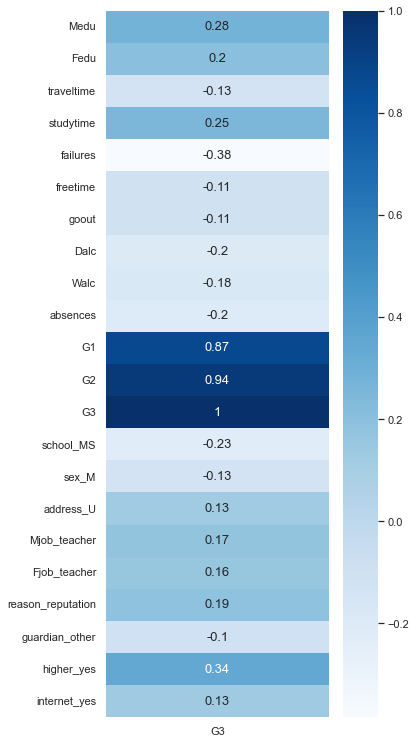

In [74]:
# calculate the correlation matrix for all columns
correlation_matrix = df_ohe_after_drop_features.corr()

# extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cbar=True, cmap='Blues', annot_kws={"size": 13})
plt.show()

In [75]:
df_ohe_after_drop_features.columns

Index(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'freetime',
       'goout', 'Dalc', 'Walc', 'absences', 'G1', 'G2', 'G3', 'school_MS',
       'sex_M', 'address_U', 'Mjob_teacher', 'Fjob_teacher',
       'reason_reputation', 'guardian_other', 'higher_yes', 'internet_yes'],
      dtype='object')

### 1. Regression Model

In [271]:
# split independent and dependent variable
X = df_ohe_after_drop_features[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'freetime',
                                'goout', 'Dalc', 'Walc', 'absences', 'school_MS','sex_M', 'address_U', 
                                'Mjob_teacher', 'Fjob_teacher','reason_reputation', 'guardian_other', 
                                'higher_yes', 'internet_yes', 'G1', 'G2']]
y = df_ohe_after_drop_features['G3']

In [272]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [80]:
# function for calculates evaluation
def calculate(model):    
    # make predictions on the test set
    y_test_pred = model.predict(X_test)

    # calculate evaluation metrics
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_test_pred)
    
    # cross-validation
    scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
    rmse_cross_val = np.sqrt(-scores.mean())
    
    return [mae, rmse, rmse_cross_val ,mse,r_squared]

In [81]:
# function for visualize dataframe results
def plot_df_result(df,title, xlabel, ylabel):
    g = df.plot(kind="bar", width=0.8, figsize=(18, 7))
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.legend(fontsize=13)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # show values
    for c in g.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        g.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=13)

In [112]:
# build function tranning regression models
def train_regression_model(X, y):
    
    model1 = KNeighborsRegressor()
    model2 = SVR()
    model3 = RandomForestRegressor()
    model4 = GradientBoostingRegressor()
    model5 = DecisionTreeRegressor()

    models = [model1, model2, model3, model4, model5]
    model_name_list = ['KNeighborsRegressor', 'SupportVectorRegression', 'RandomForestRegressor', 'GradientBoostingRegressor',
                        'DecisionTreeRegressor']
    # dataframe for results
    results = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by CV', 'MSE', 'R^2'], index=model_name_list)

    for i, model in enumerate(models):
        # train the model
        model.fit(X_train, y_train)

        # get name model
        model_name = model_name_list[i]
        results.loc[model_name, :] = calculate(model)
    return results

In [113]:
# dataframe result
regression_result = train_regression_model(X_train, y_train)
print("Bảng so sánh các tiêu chí đánh giá của các regresstion model.")
regression_result

Bảng so sánh các tiêu chí đánh giá của các regresstion model.


,MAE,RMSE,RMSE by CV,MSE,R^2
KNeighborsRegressor,0.531496,0.760801,0.794797,0.578819,0.686393
SupportVectorRegression,0.411504,0.565714,0.602885,0.320032,0.826605
RandomForestRegressor,0.394646,0.548075,0.557295,0.300386,0.837249
GradientBoostingRegressor,0.379616,0.519305,0.568187,0.269677,0.853887
DecisionTreeRegressor,0.405512,0.635251,0.720523,0.403543,0.781358


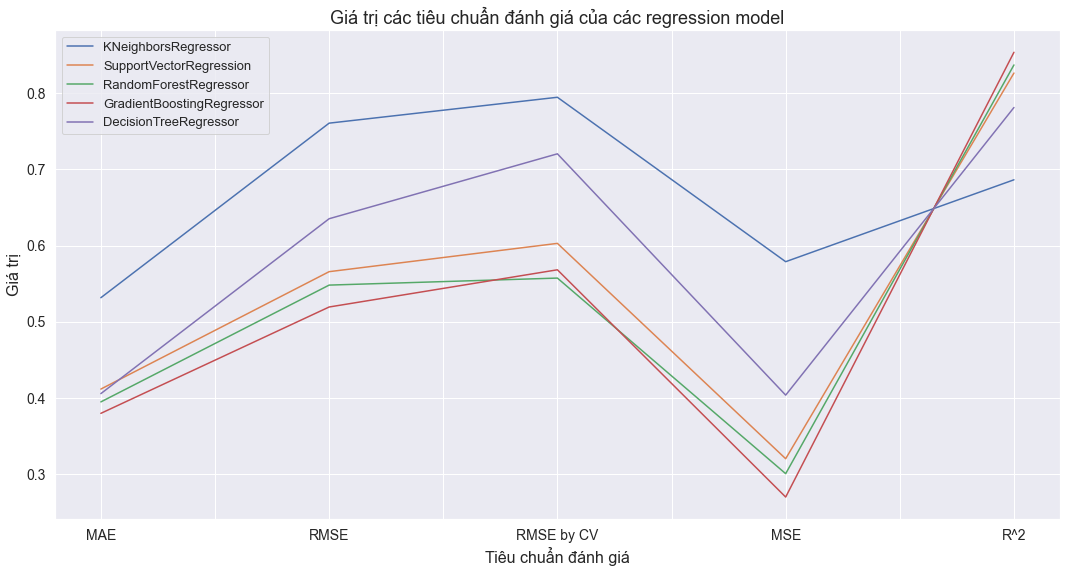

In [114]:
# visualize dataframe result
regression_result.T.plot(figsize=(18, 9))
plt.title("Giá trị các tiêu chuẩn đánh giá của các regression model", fontsize=18)
plt.xlabel("Tiêu chuẩn đánh giá", fontsize=16)
plt.legend(fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.text(2., 0.05, 'Tiêu chuẩn đánh giá', ha='center',fontsize=16)    # Xlabel
plt.ylabel("Giá trị", fontsize=16)
plt.show()

#### 1.1 Gradient bossting regressor model

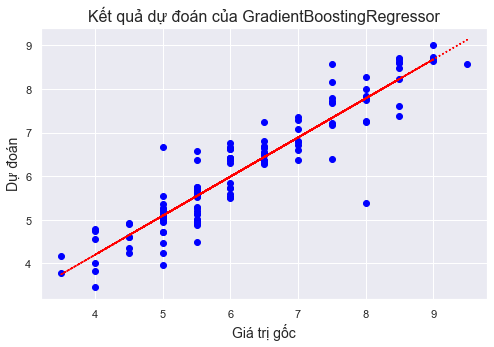

In [87]:
# gradient boosting regressor model (top 1)
best_regression_model = GradientBoostingRegressor()
best_regression_model.fit(X_train, y_train)
y_test_pred = best_regression_model.predict(X_test)

# visualize results for best regression model
n, m = polyfit(y_test,y_test_pred,1)
plt.figure(figsize=(8,5))
plt.title("Kết quả dự đoán của GradientBoostingRegressor", fontsize=16)
plt.scatter(x = y_test, y = y_test_pred, c="blue")
plt.plot(y_test,  m*(y_test) + n ,':', c="red")
plt.xlabel("Giá trị gốc", fontsize=14)
plt.ylabel("Dự đoán", fontsize=14)
plt.show()

In [90]:
# gradient boosting regressor change Loss
top_1_regression_results = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by CV', 'MSE', 'R^2'], 
                                        index=["squared_error", "absolute_error", "huber", "quantile"])

for loss in ["squared_error", "absolute_error", "huber", "quantile"]:

    # traning model
    top_1_regression = GradientBoostingRegressor(loss= loss).fit(X_train, y_train)
    
    # add results to dataframe
    top_1_regression_results.loc[loss, :] = calculate(top_1_regression)
    
print("Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số Loss (GradientBoostingRegressor)")    
top_1_regression_results

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số Loss (GradientBoostingRegressor)


,MAE,RMSE,RMSE by CV,MSE,R^2
squared_error,0.378915,0.518257,0.573696,0.268591,0.854476
absolute_error,0.37147,0.514284,0.562095,0.264488,0.856699
huber,0.369915,0.519021,0.583341,0.269383,0.854047
quantile,0.519799,0.673881,0.842217,0.454115,0.753958


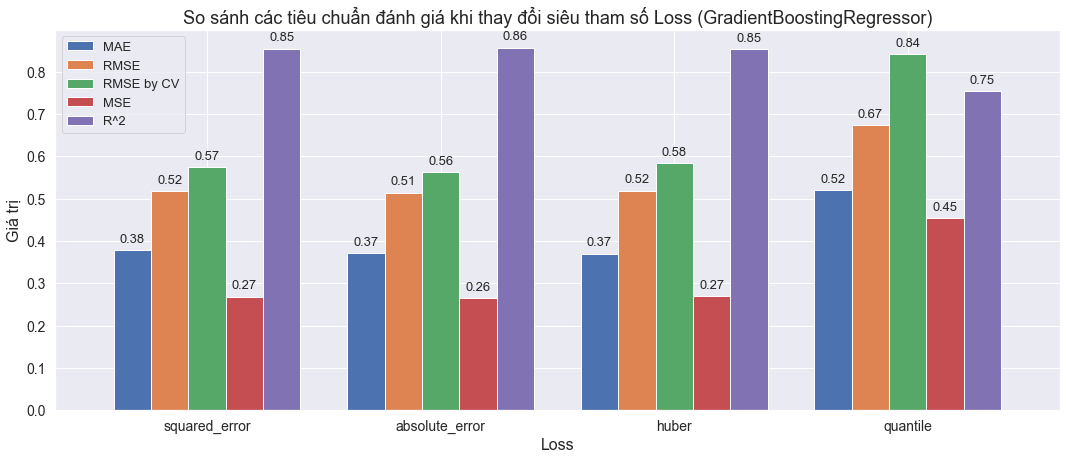

In [91]:
# visualize dataframe result (change Loss)
plot_df_result(top_1_regression_results,
               "So sánh các tiêu chuẩn đánh giá khi thay đổi siêu tham số Loss (GradientBoostingRegressor)",
               "Loss", "Giá trị")
plt.xticks(rotation=0)
plt.show()

*Note: **loss = hunter** gives the most optimal evaluation results.

In [273]:
# ggradient boosting regressor change n_estimators
top_1_regression_results_2 = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by CV', 'MSE', 'R^2'], 
                                          index=["50", "100", "200", "300"])

for n_estimators in [50, 100, 200, 300]:
    
    # traning model
    top_1_regression = GradientBoostingRegressor(loss= "huber", n_estimators=n_estimators).fit(X_train, y_train)
    
    # add results to dataframe
    top_1_regression_results_2.loc[str(n_estimators), :] = calculate(top_1_regression)
    
print("Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số n_estimators, loss = absolute_error (GradientBoostingRegressor)")    
top_1_regression_results_2

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số n_estimators, loss = absolute_error (GradientBoostingRegressor)


,MAE,RMSE,RMSE by CV,MSE,R^2
50,0.350477,0.489174,0.630934,0.239291,0.877664
100,0.363244,0.505806,0.65592,0.255839,0.869203
200,0.37338,0.521791,0.671968,0.272266,0.860806
300,0.380396,0.52764,0.676956,0.278404,0.857668


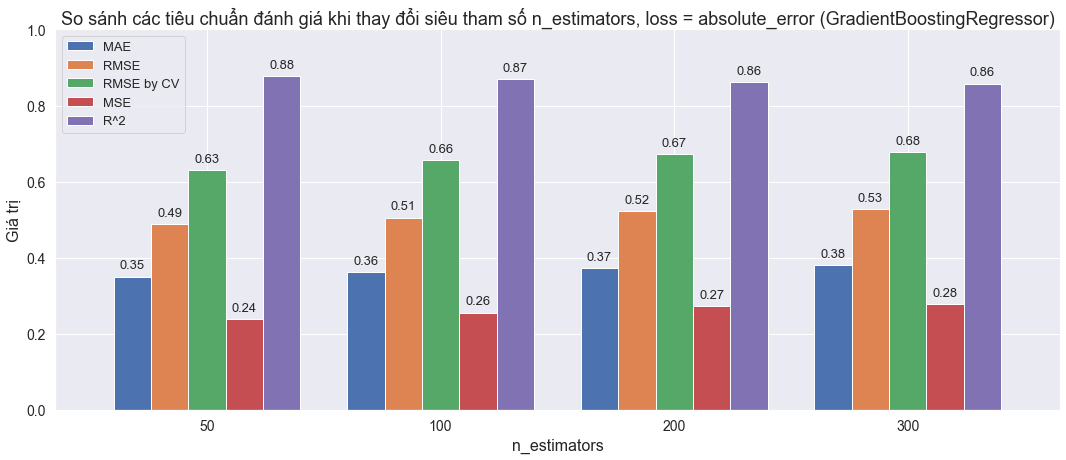

In [274]:
# visualize dataframe result change n_estimators, loss = huber (GradientBoostingRegressor)
plot_df_result(top_1_regression_results_2,
               "So sánh các tiêu chuẩn đánh giá khi thay đổi siêu tham số n_estimators, loss = absolute_error (GradientBoostingRegressor)",
               "n_estimators", "Giá trị")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.show()

*Note: **loss = huber, n_estimators = 50** are the two hyperparameters with the best evaluation results.

#### 1.2 Random Forest Regressor model

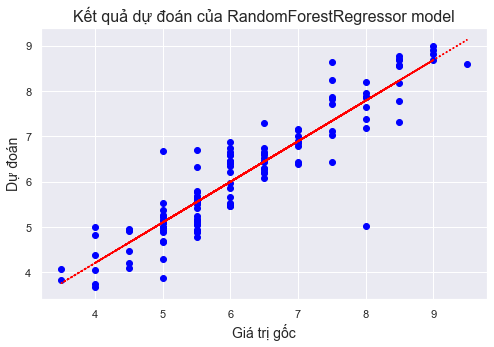

In [115]:
# random forest regressor model (top 2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# visualize results for best regression model
n, m = polyfit(y_test,y_test_pred,1)
plt.figure(figsize=(8,5))
plt.title("Kết quả dự đoán của RandomForestRegressor model", fontsize=16)
plt.scatter(x = y_test, y = y_test_pred, c="blue")
plt.plot(y_test,  m*(y_test) + n ,':', c="red")
plt.xlabel("Giá trị gốc", fontsize=14)
plt.ylabel("Dự đoán", fontsize=14)
plt.show()

In [118]:
# random forest regressor change n_estimators
top_2_regression_results = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by CV', 'MSE', 'R^2'], 
                                          index=["50", "100", "200", "300"])

for i, n_estimator in enumerate([50, 100, 200, 300]):
    
    # traning model
    top_2_regression = RandomForestRegressor(n_estimators= n_estimator).fit(X_train, y_train)
    
    # add results to dataframe
    top_2_regression_results.iloc[i, :] = calculate(top_2_regression)
    
print("Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số n_estimators(RandomForestRegressor)")    
top_2_regression_results

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số n_estimators(RandomForestRegressor)


,MAE,RMSE,RMSE by CV,MSE,R^2
50,0.393465,0.546439,0.541255,0.298596,0.838219
100,0.393937,0.547936,0.542958,0.300234,0.837332
200,0.391063,0.543714,0.543897,0.295625,0.839829
300,0.390066,0.543707,0.551196,0.295618,0.839833


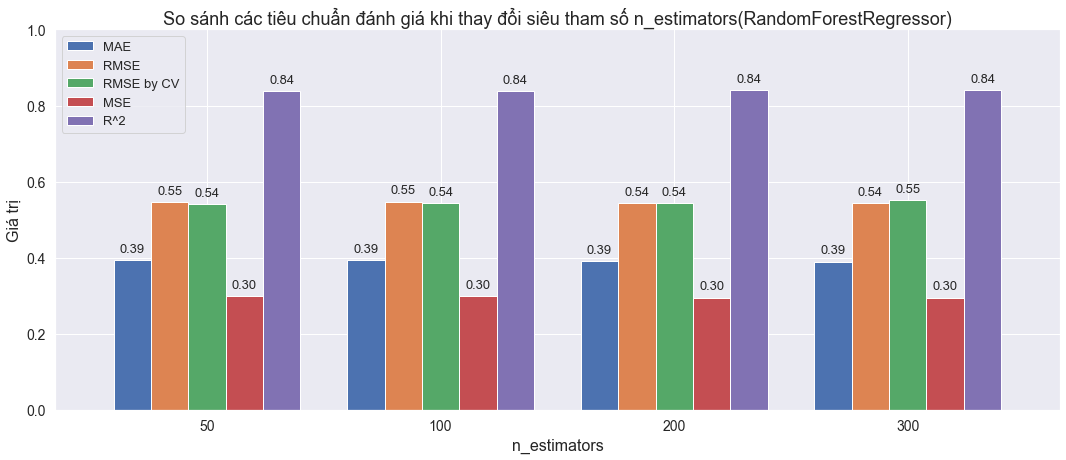

In [120]:
# visualize dataframe result (change n_estimators)
plot_df_result(top_2_regression_results,
               "So sánh các tiêu chuẩn đánh giá khi thay đổi siêu tham số n_estimators(RandomForestRegressor)",
               "n_estimators", "Giá trị")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

*Note: **n_estimators = 200** gives the most optimal evaluation results.

In [126]:
# random forest regressor change criterion
top_2_regression_results_2 = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by CV', 'MSE', 'R^2'], 
                                          index=['squared_error', 'absolute_error', 'friedman_mse', 'poisson'])

for cr in ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']:
    
    # traning model
    top_2_regression = RandomForestRegressor(criterion=cr, n_estimators=200).fit(X_train, y_train)
    
    # add results to dataframe
    top_2_regression_results_2.loc[cr, :] = calculate(top_2_regression)
    
print("Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số criterion(RandomForestRegressor)")    
top_2_regression_results_2

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số criterion(RandomForestRegressor)


,MAE,RMSE,RMSE by CV,MSE,R^2
squared_error,0.390118,0.542253,0.543073,0.294038,0.840688
absolute_error,0.379429,0.526796,0.541871,0.277514,0.849642
friedman_mse,0.386535,0.539507,0.551373,0.291067,0.842298
poisson,0.390217,0.545098,0.544832,0.297132,0.839012


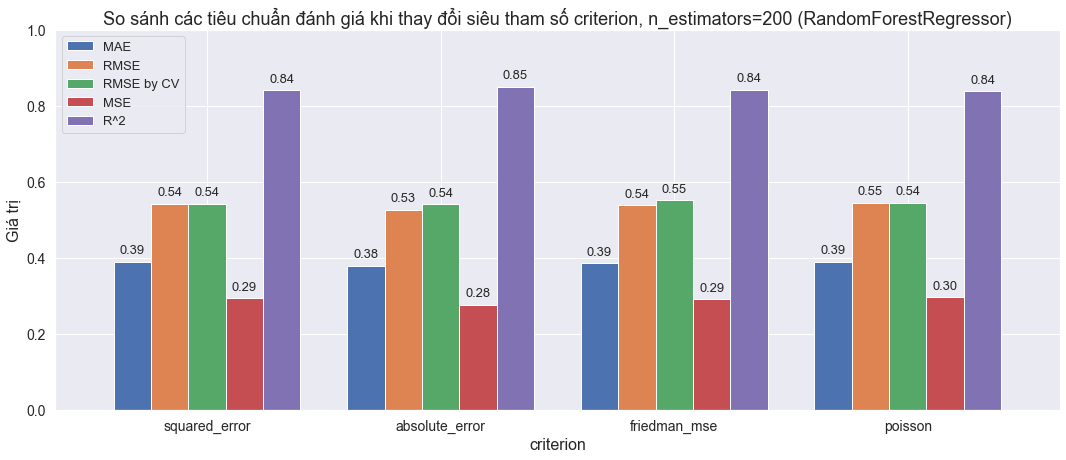

In [129]:
# visualize dataframe result (change n_estimators)
plot_df_result(top_2_regression_results_2,
               "So sánh các tiêu chuẩn đánh giá khi thay đổi siêu tham số criterion, n_estimators=200 (RandomForestRegressor)",
               "criterion", "Giá trị")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

*Note: **criterion = absolute_error, n_estimators = 200** are the two hyperparameters with the best evaluation results.

#### 1.3 Final evaluation

In [275]:
final_dataframe = pd.concat([top_1_regression_results_2.iloc[0], top_2_regression_results_2.iloc[1]], axis=1)
final_dataframe.columns = ['GradientBoostingRegressor (loss=huber, n_estimators=50)', 'RandomForestRegressor (criterion=absolute_error, n_estimators=200)']
final_dataframe.T

,MAE,RMSE,RMSE by CV,MSE,R^2
"GradientBoostingRegressor (loss=huber, n_estimators=50)",0.350477,0.489174,0.630934,0.239291,0.877664
"RandomForestRegressor (criterion=absolute_error, n_estimators=200)",0.379429,0.526796,0.541871,0.277514,0.849642


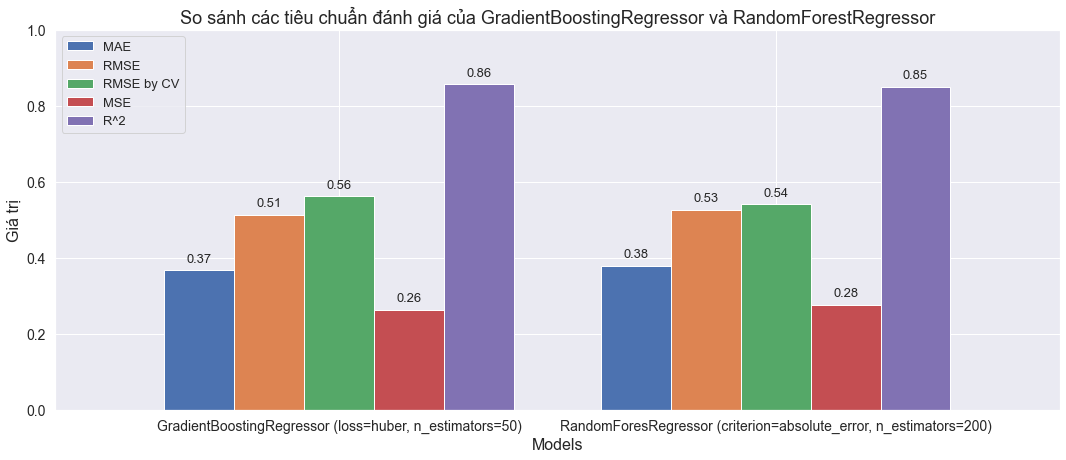

In [141]:
# visualize final result
plot_df_result(final_dataframe.T,
               "So sánh các tiêu chuẩn đánh giá của GradientBoostingRegressor và RandomForestRegressor",
               "Models", "Giá trị")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

In [142]:
gbr_model = GradientBoostingRegressor(loss= "huber", n_estimators=50).fit(X_train, y_train)

# save GradientBoostingRegressor model
pickle.dump(gbr_model, open('./models/gbr_model.pkl', 'wb'))

In [143]:
# load GradientBoostingRegressor model
pickled_gbr_model = pickle.load(open('./models/gbr_model.pkl', 'rb'))

# predict new student
new_student=np.array([1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 6., 8.]).reshape(1,-1)
print(f"Điểm dự đoán: {pickled_gbr_model.predict(new_student)[0]}")

Điểm dự đoán: 7.904245700359103


c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Binary classification

In [189]:
# binary classification
# split independent and dependent variable
X = df_ohe_after_drop_features[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'freetime',
                                'goout', 'Dalc', 'Walc', 'absences', 'school_MS','sex_M', 'address_U', 
                                'Mjob_teacher', 'Fjob_teacher','reason_reputation', 'guardian_other', 
                                'higher_yes', 'internet_yes', 'G1', 'G2']]
y = df_ohe_after_drop_features['G3'].apply(lambda x: 1 if x >= 5 else 0) # 0: không đạt; 1: đạt

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [191]:
print(X.shape)
print(y.shape)

(633, 21)
(633,)


In [173]:
# build function trainning binary classification model
def train_binary_classification_model(X, y):

    # initialization models
    model1 = GradientBoostingClassifier()
    model2 = MultinomialNB()
    model3 = DecisionTreeClassifier()
    model4 = LinearSVC()
    model5 = SGDClassifier()
    model6 = KNeighborsClassifier()
    model7 = RandomForestClassifier()

    models = [model1, model2, model3, model4, model5, model6, model7]
    model_name_list = ['GradientBoostingClassifier', 'MultinomialNB', 'DecisionTreeClassifier',
           'LinearSVC', 'SGDClassifier', 'KNeighborsClassifier', 'RandomForestClassifier']
    
    # dataframe for results
    results = pd.DataFrame(columns=["Test accuracy", "Train accuracy"], index=model_name_list)

    for i, model in enumerate(models):
        
        # train the model
        model.fit(X, y)
        
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)

        # get name model
        model_name = model_name_list[i]
        results.loc[model_name, :] = [test_acc, train_acc]

    return results

In [178]:
# dataframe comparing accuracy between models
classification_result = train_binary_classification_model(X_train, y_train)
classification_result

c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Test accuracy,Train accuracy
GradientBoostingClassifier,0.929134,0.994071
MultinomialNB,0.834646,0.855731
DecisionTreeClassifier,0.913386,1.0
LinearSVC,0.937008,0.950593
SGDClassifier,0.905512,0.897233
KNeighborsClassifier,0.92126,0.916996
RandomForestClassifier,0.937008,1.0


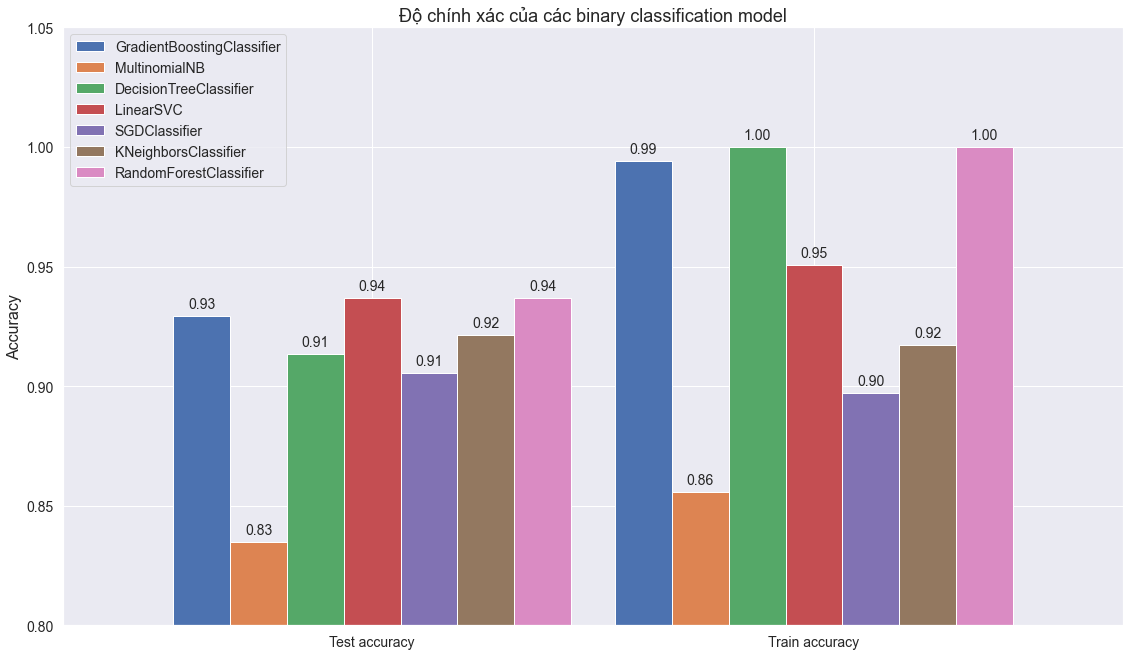

In [179]:
# visualize dataframe result
g1 = classification_result.T.plot(kind="bar", width=0.9, figsize=(19, 11))
plt.title("Độ chính xác của các binary classification model", fontsize=18)
plt.ylim(0.8,1.05)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylabel("Accuracy", fontsize=16)

# show values
for c in g1.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
plt.show()

#### 2.1 LinearSVC model

c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


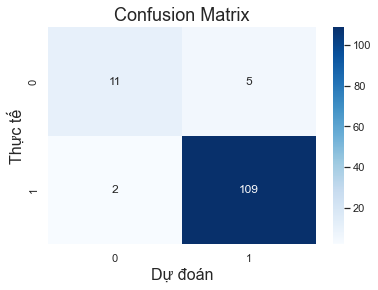

In [192]:
# svc model (top 1)
best_classification_model = LinearSVC()
best_classification_model.fit(X_train, y_train)

y_test_pred = best_classification_model.predict(X_test)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán', fontsize=16)
plt.ylabel('Thực tế', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [196]:
def classification_calculate (model):
    # make predictions on the test set
    y_test_pred = model.predict(X_test)

    report_dict = classification_report(y_test, y_test_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report_dict).transpose()
    precision = round(df_classification_report.iloc[3, 0].tolist(),2)
    recall = round(df_classification_report.iloc[3, 1].tolist(),2)
    f1_score = round(df_classification_report.iloc[3, 2].tolist(),2)
    acc = round(df_classification_report.iloc[2, 2].tolist(),2)
    
    return [precision, recall, f1_score, acc]

In [197]:
# svc change C
top_1_classification_results = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                        index=["0.1", "0.5", "1.0", "4"])

for c in [0.1, 0.5, 1., 4]:
    
    top_1_classification = LinearSVC(C=c).fit(X_train, y_train)
    
    # add results to dataframe
    top_1_classification_results.loc[str(c), :] = classification_calculate(top_1_classification)

c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [198]:
print("Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số C (SVC)")    
top_1_classification_results

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số C (SVC)


,Precision,Recall,F1-score,Acc
0.1,0.86,0.8,0.82,0.93
0.5,0.87,0.83,0.85,0.94
1.0,0.9,0.83,0.86,0.94
4,0.86,0.8,0.82,0.93


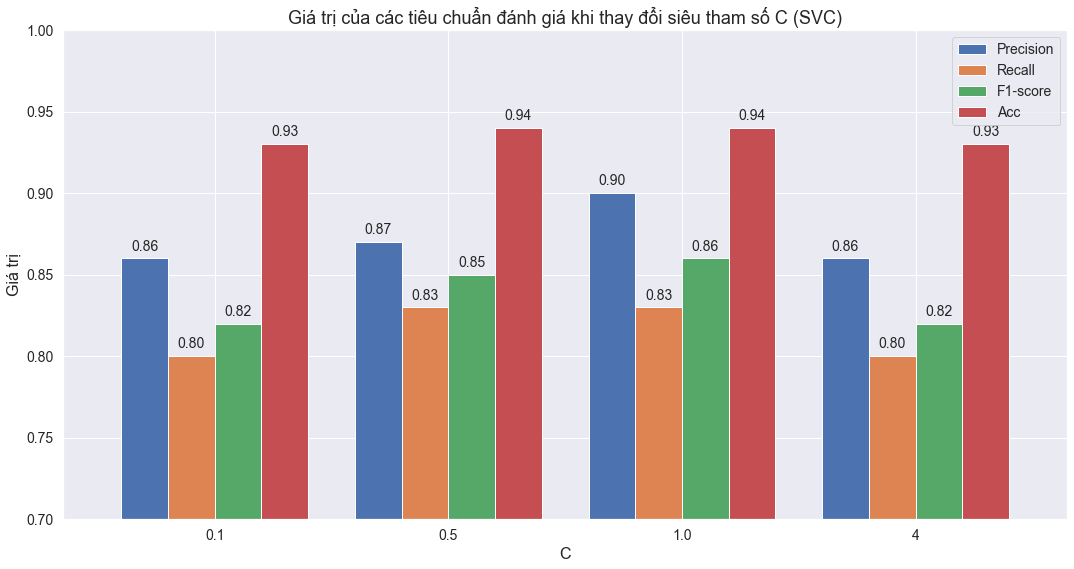

In [199]:
# plot barchar
g1 = top_1_classification_results.plot(kind='bar',width=0.8, figsize=(18, 9))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Giá trị", fontsize=16)
plt.ylim(0.7,1)
plt.legend(fontsize=14)
plt.xlabel('C', ha='center',fontsize=16)
plt.title("Giá trị của các tiêu chuẩn đánh giá khi thay đổi siêu tham số C (SVC)", fontsize=18)
# show values
for c in g1.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
plt.show()

*Note: **C = 1.0** gives the most optimal evaluation results.

In [207]:
# SVC change Loss
top_1_classification_results2 = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                        index=["hinge", "squared_hinge"])

for loss in ["hinge", "squared_hinge"]:
    
    top_1_classification = LinearSVC(C=1.0, loss=loss).fit(X_train, y_train)
    
    # add results to dataframe
    top_1_classification_results2.loc[loss, :] = classification_calculate(top_1_classification)

c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [208]:
print("Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số Loss, C = 1.0 (SVC)")    
top_1_classification_results2

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số Loss, C = 1.0 (SVC)


,Precision,Recall,F1-score,Acc
hinge,0.83,0.79,0.81,0.92
squared_hinge,0.9,0.83,0.86,0.94


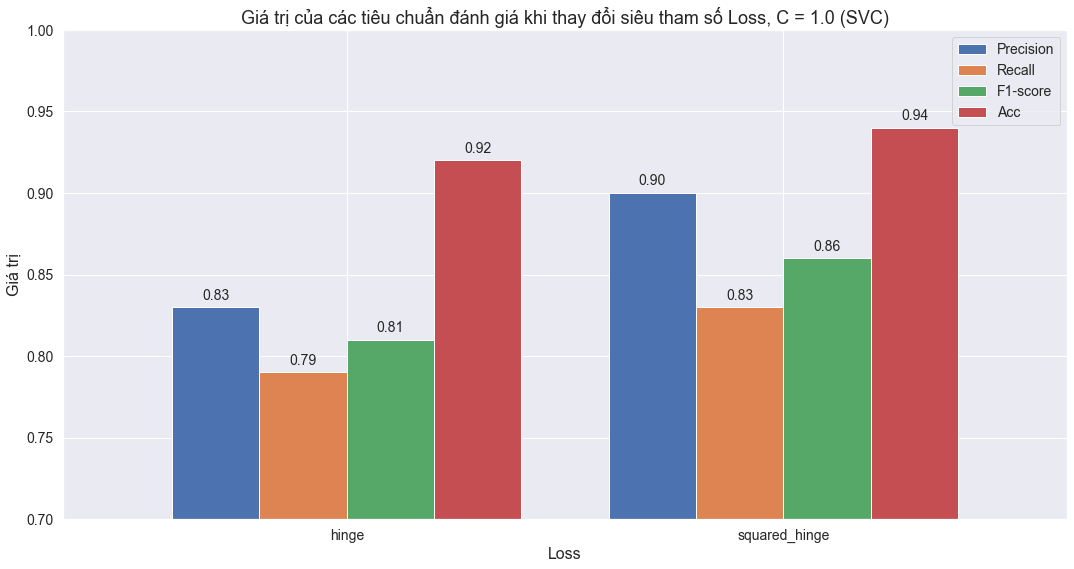

In [209]:
# plot barchar
g1 = top_1_classification_results2.plot(kind='bar',width=0.8, figsize=(18, 9))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Giá trị", fontsize=16)
plt.ylim(0.7,1)
plt.legend(fontsize=14)
plt.xlabel('Loss', ha='center',fontsize=16)
plt.title("Giá trị của các tiêu chuẩn đánh giá khi thay đổi siêu tham số Loss, C = 1.0 (SVC)", fontsize=18)
# show values
for c in g1.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
plt.show()

*Note: **loss = squared_hinge, C = 1.0** are the two hyperparameters with the best evaluation results.

c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


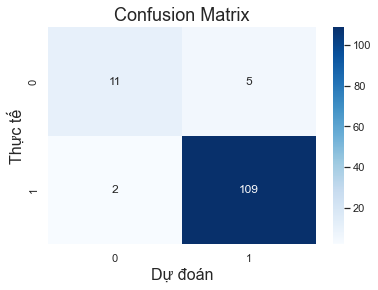

In [210]:
# SVC model (loss = squared_hinge, C = 1.0)
svc_model = LinearSVC(C=1, loss='squared_hinge')
svc_model.fit(X_train, y_train)
y_test_pred = svc_model.predict(X_test)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán', fontsize=16)
plt.ylabel('Thực tế', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

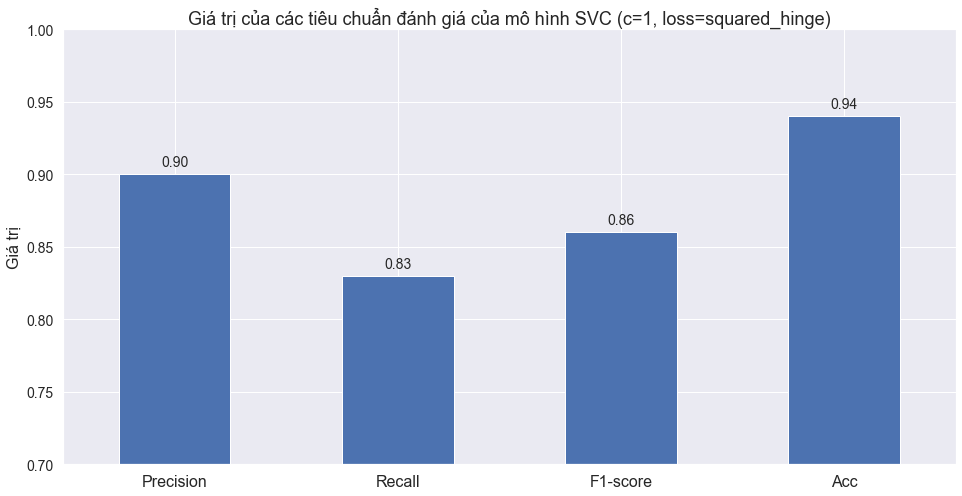

,Precision,Recall,F1-score,Acc
"SVC (c=1, loss=squared_hinge)",0.9,0.83,0.86,0.94


In [213]:
# add results to dataframe
svm_results = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                        index=["SVC (c=1, loss=squared_hinge)"])
svm_results.iloc[0, :] = classification_calculate(svc_model)

# plot barchar
g1 = svm_results.T.plot(kind='bar', legend=None, figsize=(16,8))
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel("Giá trị", fontsize=16)
plt.ylim(0.7,1)
plt.title("Giá trị của các tiêu chuẩn đánh giá của mô hình SVC (c=1, loss=squared_hinge)", fontsize=18)
# show values
for c in g1.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
plt.show()

# show dataframe
svm_results

#### 2.2 RandomForest Classifier model

c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


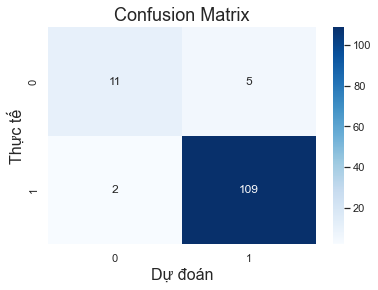

In [214]:
# randomforest classifier model (top 2)
best_classification_model_2 = LinearSVC()
best_classification_model_2.fit(X_train, y_train)

y_test_pred = best_classification_model_2.predict(X_test)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán', fontsize=16)
plt.ylabel('Thực tế', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [223]:
# rfc change n_estimators
top_2_classification_results = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                        index=["50", "100", "200", "300"])

for n in [50, 100, 200, 300]:
    
    top_2_classification = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)
    
    # add results to dataframe
    top_2_classification_results.loc[str(n), :] = classification_calculate(top_2_classification)

In [224]:
print("Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số n_estimators (RFC)")    
top_2_classification_results

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số n_estimators (RFC)


,Precision,Recall,F1-score,Acc
50,0.87,0.89,0.88,0.94
100,0.87,0.83,0.85,0.94
200,0.87,0.83,0.85,0.94
300,0.87,0.83,0.85,0.94


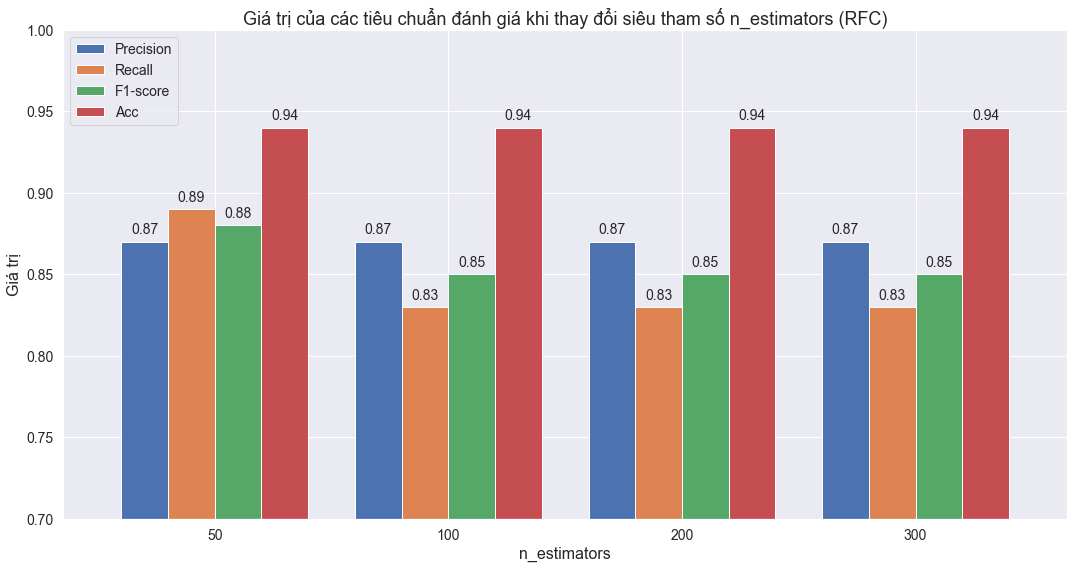

In [225]:
# plot barchar
g1 = top_2_classification_results.plot(kind='bar',width=0.8, figsize=(18, 9))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Giá trị", fontsize=16)
plt.ylim(0.7,1)
plt.legend(fontsize=14, loc='upper left')
plt.xlabel('n_estimators', ha='center',fontsize=16)
plt.title("Giá trị của các tiêu chuẩn đánh giá khi thay đổi siêu tham số n_estimators (RFC)", fontsize=18)
# show values
for c in g1.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
plt.show()

*Note: **n_estimators = 50** gives the most optimal evaluation results.

In [237]:
# rfc change criterion
top_2_classification_results_2 = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                        index=["gini", "entropy", "log_loss"])

for cr in ["gini", "entropy", "log_loss"]:
    
    top_2_classification = RandomForestClassifier(n_estimators=50, criterion=cr).fit(X_train, y_train)
    
    # add results to dataframe
    top_2_classification_results_2.loc[cr, :] = classification_calculate(top_2_classification)

In [238]:
print("Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số criterion, n_estimators=50 (RFC)")    
top_2_classification_results_2

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số criterion, n_estimators=50 (RFC)


,Precision,Recall,F1-score,Acc
gini,0.87,0.83,0.85,0.94
entropy,0.83,0.79,0.81,0.92
log_loss,0.84,0.83,0.83,0.93


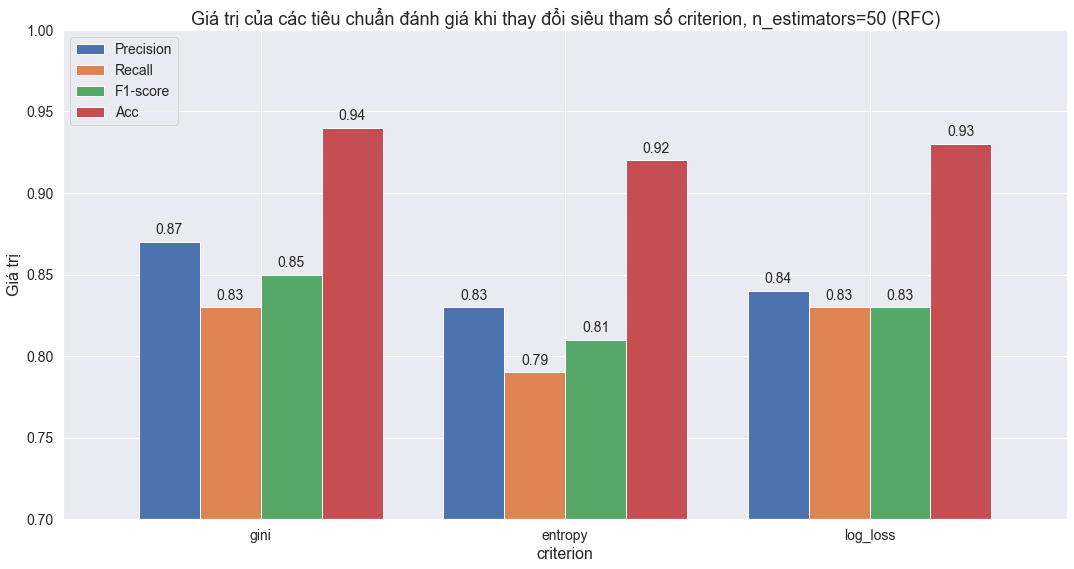

In [239]:
# plot barchar
g1 = top_2_classification_results_2.plot(kind='bar',width=0.8, figsize=(18, 9))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Giá trị", fontsize=16)
plt.ylim(0.7,1)
plt.legend(fontsize=14, loc='upper left')
plt.xlabel('criterion', ha='center',fontsize=16)
plt.title("Giá trị của các tiêu chuẩn đánh giá khi thay đổi siêu tham số criterion, n_estimators=50 (RFC)", fontsize=18)
# show values
for c in g1.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
plt.show()

*Note: **n_estimators = 50, criterion = gini** are the two hyperparameters with the best evaluation results.

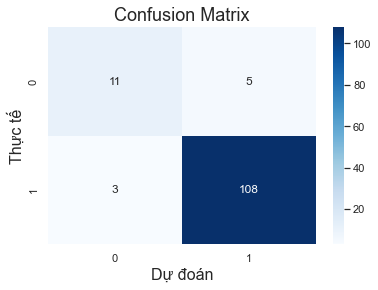

In [248]:
# RFC model (n_estimators = 50, criterion = gini)
rfc_model = RandomForestClassifier(n_estimators=50, criterion='gini')
rfc_model.fit(X_train, y_train)
y_test_pred = rfc_model.predict(X_test)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán', fontsize=16)
plt.ylabel('Thực tế', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

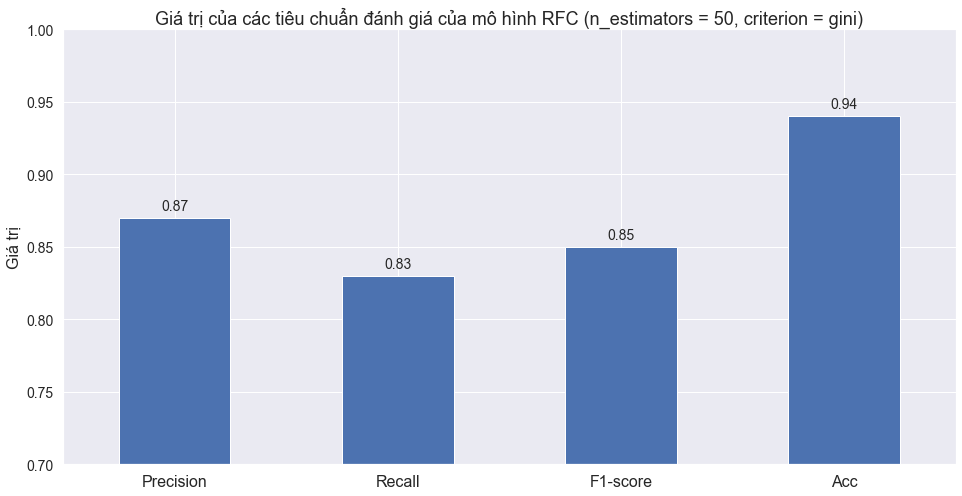

,Precision,Recall,F1-score,Acc
"RFC (n_estimators = 50, criterion = gini)",0.87,0.83,0.85,0.94


In [249]:
# add results to dataframe
rfc_results = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                        index=["RFC (n_estimators = 50, criterion = gini)"])
rfc_results.iloc[0, :] = classification_calculate(rfc_model)

# plot barchar
g1 = rfc_results.T.plot(kind='bar', legend=None, figsize=(16,8))
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel("Giá trị", fontsize=16)
plt.ylim(0.7,1)
plt.title("Giá trị của các tiêu chuẩn đánh giá của mô hình RFC (n_estimators = 50, criterion = gini)", fontsize=18)
# show values
for c in g1.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
plt.show()

# show dataframe
rfc_results

#### 2.3 Final calculate

In [251]:
final_dataframe_2 = pd.concat([svm_results.iloc[0], rfc_results.iloc[0]], axis=1)
final_dataframe_2.columns = ['LinearSVC (c=1, loss=squared_hinge)', 'RandomForesClassifier (n_estimators = 50, criterion = gini)']
final_dataframe_2.T

,Precision,Recall,F1-score,Acc
"LinearSVC (c=1, loss=squared_hinge)",0.9,0.83,0.86,0.94
"RandomForesClassifier (n_estimators = 50, criterion = gini)",0.87,0.83,0.85,0.94


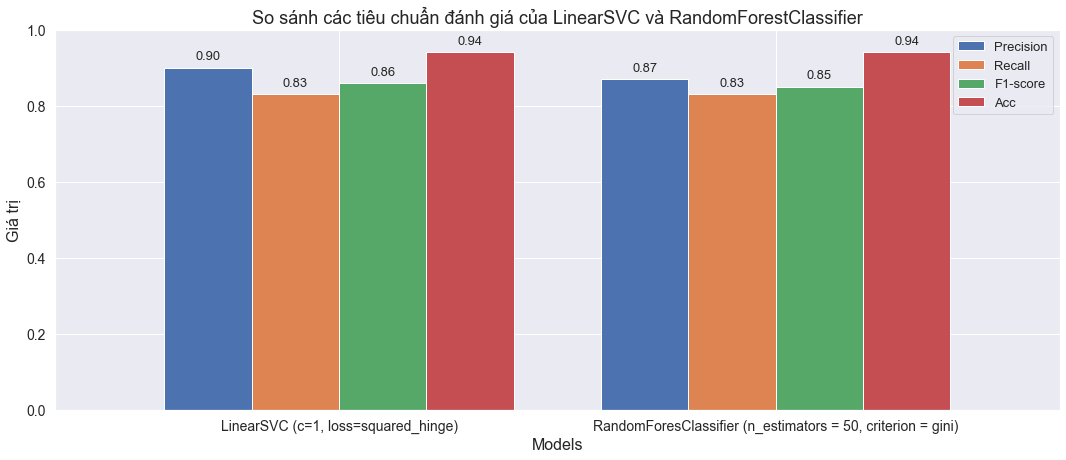

In [252]:
# visualize final result
plot_df_result(final_dataframe_2.T,
               "So sánh các tiêu chuẩn đánh giá của LinearSVC và RandomForestClassifier",
               "Models", "Giá trị")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

In [253]:
# save svc model
pickle.dump(svc_model, open('./models/svc_model.pkl', 'wb'))

In [254]:
# load svc model
pickled_svc_model = pickle.load(open('./models/svc_model.pkl', 'rb'))

# predict new student
new_student = np.array([1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 6., 8.]).reshape(1,-1)
result = "Đạt" if pickled_svc_model.predict(new_student)==1 else "Không đạt"
print(f"Kết quả dự đoán: {result}")

Kết quả dự đoán: Đạt


c:\Users\letha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
